# Early Prediction of Chronic Kidney Disease 


Importing Libaries

In [6]:
import pandas as pd #used for data manipulation
import numpy as np #used for numerical analysis
from collections import Counter as c # return counts of number of classess
import matplotlib.pyplot as plt #used for data Visualization
import seaborn as sns #data visualization library
import missingno as msno #finding missing values
from sklearn.metrics import accuracy_score, confusion_matrix#model performance
from sklearn.preprocessing import LabelEncoder #encoding the levels of categorical features
import pickle #Python object hierarchy is converted into a byte stream

Loading the dataset

In [7]:
data=pd.read_csv("CKD.csv") #loading the csv data

Data Pre-Processing

In [8]:
data.head() #return you the first 5 rows values

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
data.tail() #return you the last 5 rows values

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


Dropping id column

In [10]:
data.drop(["id"],axis=1,inplace=True) # drop is used for dropping the column

Renaming the Column Names

In [11]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [12]:
data.columns=['age','blood_pressure','specific_gravity','albumin',
              'sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria',
              'blood glucose random','blood_urea','serum_creatinine','sodium','potassium',
              'hemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
              'hypertension','diabetesmellitus','coronary_artery_disease','appetite',
              'pedal_edema','anemia','class']
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

Understanding the data type and its summary

In [13]:
data.info() #info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood glucose random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [14]:
data.describe() # computes summary values for continous column data

,age,blood_pressure,specific_gravity,albumin,sugar,blood glucose random,blood_urea,serum_creatinine,sodium,potassium,hemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Observing Target, Categorical and Numerical Columns

Target Column

In [15]:
data['class'].unique() # find the unique elements of an array

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

Rectifying the Target Column

In [16]:
data['class']=data['class'].replace("ckd\t","ckd") #replace is used for renaming
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [17]:
np.unique(data.dtypes,return_counts=True)

(array([dtype('float64'), dtype('O')], dtype=object),
 array([11, 14], dtype=int64))

Categorical Columns

In [18]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values) # only fetch the object type columns
print(catcols)

{'bacteria', 'pus_cell_clumps', 'white_blood_cell_count', 'appetite', 'red_blood_cell_count', 'pus_cell', 'hypertension', 'pedal_edema', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'anemia', 'packed_cell_volume', 'red_blood_cells'}


In [19]:
for i in catcols:
    print("Columns :",i)
    print(c(data[i])) #using counter for checking the number of classess in the column
    print('*'*120+'\n')

Columns : bacteria
Counter({'notpresent': 374, 'present': 22, nan: 4})
************************************************************************************************************************

Columns : pus_cell_clumps
Counter({'notpresent': 354, 'present': 42, nan: 4})
************************************************************************************************************************

Columns : white_blood_cell_count
Counter({nan: 105, '9800': 11, '6700': 10, '9600': 9, '9200': 9, '7200': 9, '6900': 8, '11000': 8, '5800': 8, '7800': 7, '9100': 7, '9400': 7, '7000': 7, '4300': 6, '6300': 6, '10700': 6, '10500': 6, '7500': 5, '8300': 5, '7900': 5, '8600': 5, '5600': 5, '10200': 5, '5000': 5, '8100': 5, '9500': 5, '6000': 4, '6200': 4, '10300': 4, '7700': 4, '5500': 4, '10400': 4, '6800': 4, '6500': 4, '4700': 4, '7300': 3, '4500': 3, '8400': 3, '6400': 3, '4200': 3, '7400': 3, '8000': 3, '5400': 3, '3800': 2, '11400': 2, '5300': 2, '8500': 2, '14600': 2, '7100': 2, '13200': 2, '9000

Removing the Columns which are not Categorical

In [20]:
catcols.remove('red_blood_cell_count') # remove is used for removing a particular column
catcols.remove('packed_cell_volume')
catcols.remove('white_blood_cell_count')
print(catcols)

{'bacteria', 'pus_cell_clumps', 'appetite', 'pus_cell', 'hypertension', 'pedal_edema', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'anemia', 'red_blood_cells'}


Numerical Columns

In [21]:
contcols=set(data.dtypes[data.dtypes!='O'].index.values)# only fetech the float and int type columns
#contcols=pd.DataFrame(data,columns=contcols)
print(contcols)

{'albumin', 'specific_gravity', 'sugar', 'blood glucose random', 'hemoglobin', 'sodium', 'age', 'blood_pressure', 'potassium', 'serum_creatinine', 'blood_urea'}


In [22]:
for i in contcols:
    print("Continous Columns :",i)
    print(c(data[i]))
    print('*'*120+'\n')

Continous Columns : albumin
Counter({0.0: 199, 1.0: 44, 2.0: 43, 3.0: 43, 4.0: 24, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, 5.0: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})
************************************************************************************************************************

Continous Columns : specific_gravity
Counter({1.02: 106, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1,

Removing the Columns which are not Numerrical

In [23]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'blood glucose random', 'hemoglobin', 'sodium', 'age', 'blood_pressure', 'potassium', 'serum_creatinine', 'blood_urea'}


Adding columns which we found Continuous

In [24]:
contcols.add('red_blood_cell_count') # using add we can add the column
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'white_blood_cell_count', 'blood glucose random', 'hemoglobin', 'red_blood_cell_count', 'sodium', 'age', 'blood_pressure', 'potassium', 'packed_cell_volume', 'serum_creatinine', 'blood_urea'}


Adding columns which we found Categrical

In [25]:
catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')
print(catcols)

{'specific_gravity', 'bacteria', 'pus_cell_clumps', 'albumin', 'appetite', 'sugar', 'pus_cell', 'hypertension', 'pedal_edema', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'anemia', 'red_blood_cells'}


Rectifying the Categorical Columns Classes

In [26]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no') # replacing \tno with no
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [27]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(data['diabetesmellitus'])

Counter({'no': 261, 'yes': 137, nan: 2})

Null Values

In [28]:
data.isnull().any() #it will return true if any columns is having null values

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [29]:
data.isnull().sum() #returns the count of null values present in each column

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood glucose random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

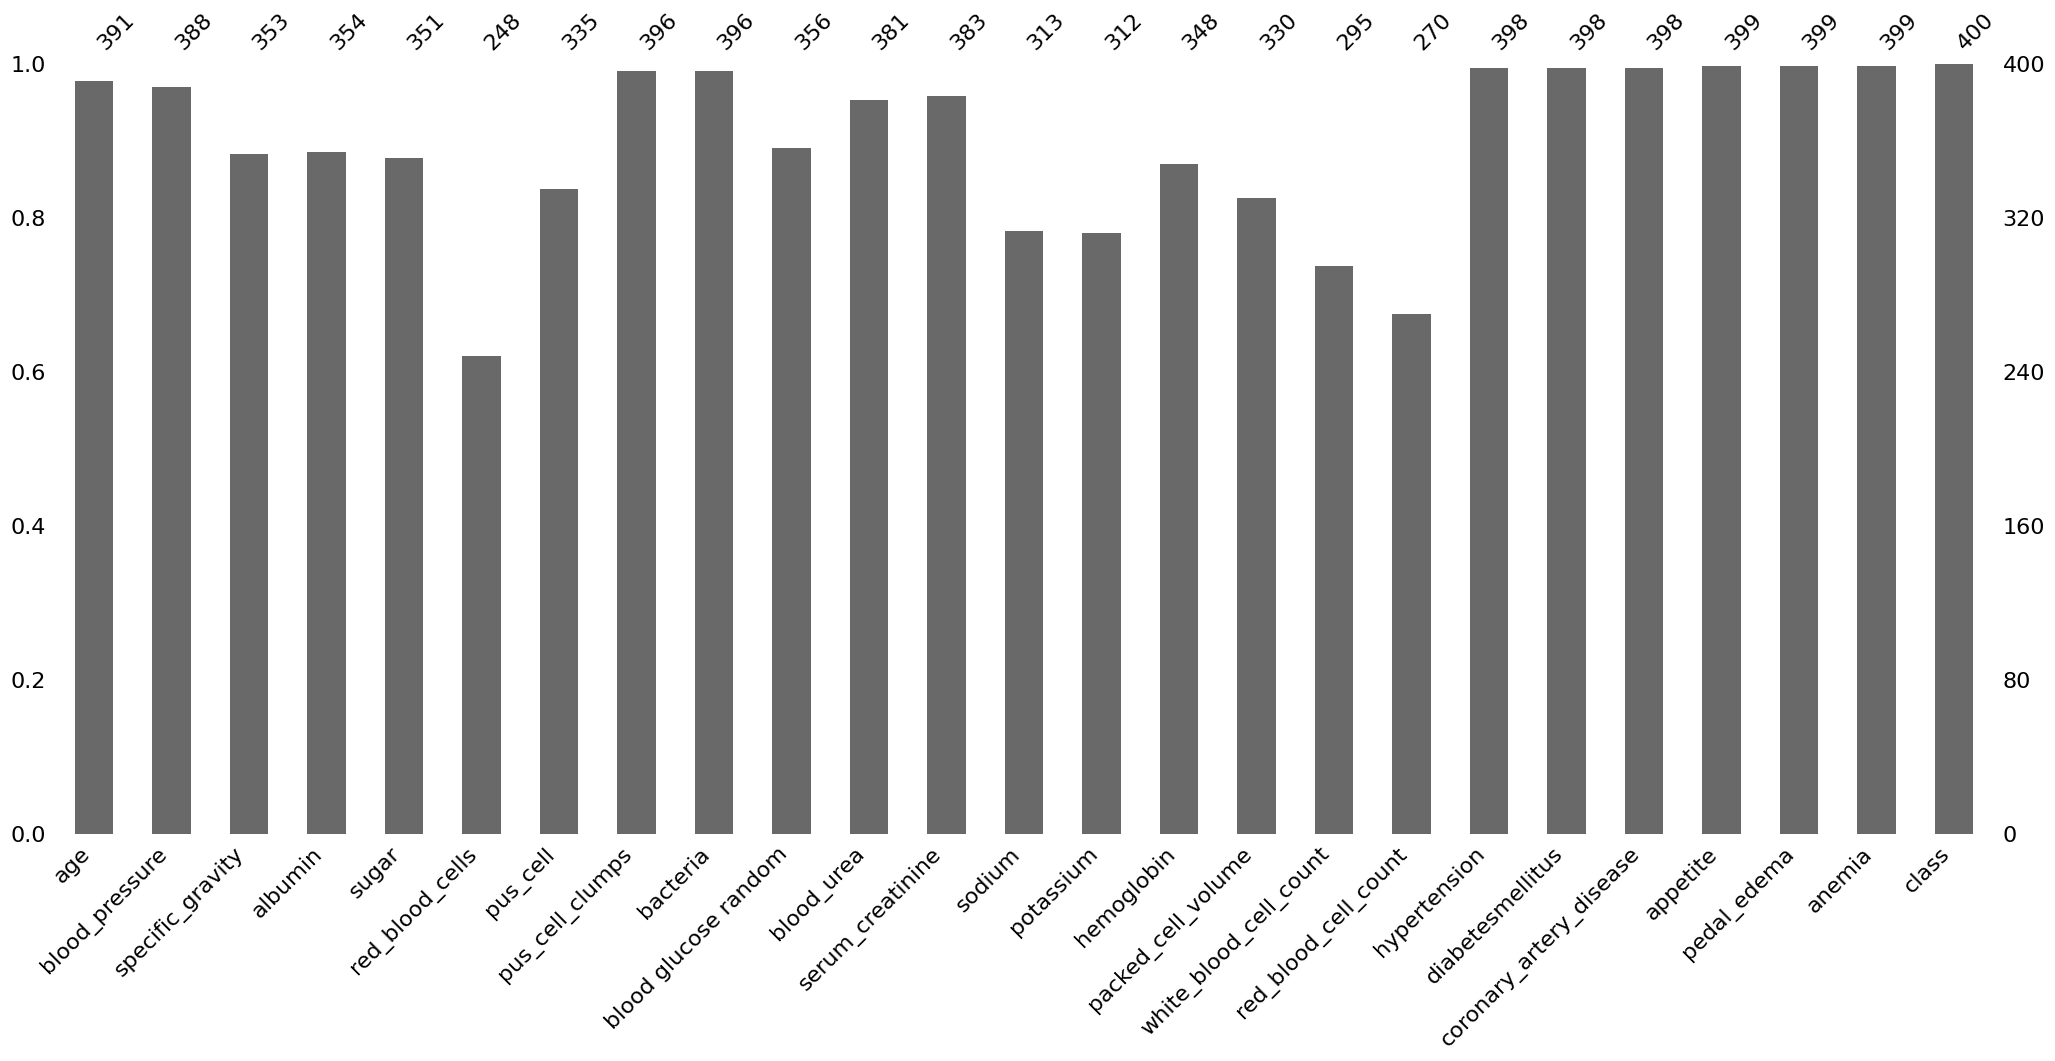

In [30]:
#sns.heatmap(data.isnull(), cbar=False) #using seaborn we are making heatmap for finding null values

msno.bar(data) # plotting the null values in the bar graph
plt.show()

Converting the column into numeric type

In [31]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count = pd.to_numeric(data.red_blood_cell_count, errors='coerce')

Handling Continous/numerical columns Null values

In [32]:
data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data[ 'specific_gravity'].fillna(data[ 'specific_gravity'].mode()[0],inplace=True)

C:\Users\NANDINI\AppData\Local\Temp\ipykernel_13012\403452607.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['blood glucose random'].fillna(data['blood glucose random'].mean(),inplace=True)
C:\Users\NANDINI\AppData\Local\Temp\ipykernel_13012\403452607.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [33]:
data.isnull().sum().sum()

0

Labeling Encoding of Categorical Column

In [34]:
#'specific_gravity','albumin', 'sugar'(as these columns are  numerical it is removed)
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
 'hypertension','pus_cell','pus_cell_clumps','red_blood_cells'] #only considered the text class columns

In [35]:
from sklearn.preprocessing import LabelEncoder #imorting the LabelEncoding from sklearn
for i in catcols: #looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder() # creating an object of LabelEncoder
    print(c(data[i])) #getting the classes values before transformation
    data[i] = LEi.fit_transform(data[i])# trannsforming our text classes to numerical values
    print(c(data[i])) #getting the classes values after transformation
    print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 250, 'notckd': 150})
Counter({0: 250, 1: 150})
****************************************************************************************************
LABEL ENCODING OF: coronary_artery_disease
Counter(

Data Visualization

Age vs Blood Pressure

Text(0.5, 1.0, 'age VS blood Scatter Plot')

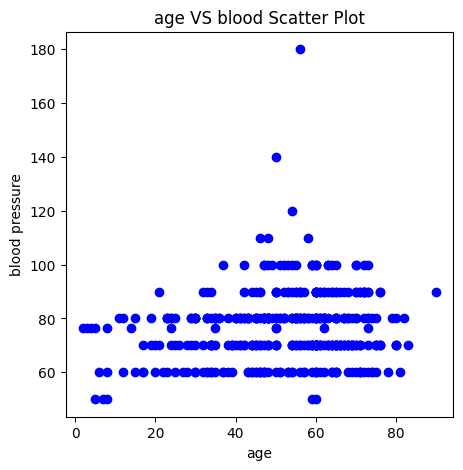

In [36]:
import matplotlib.pyplot as plt # import the matplotlib libaray
fig=plt.figure(figsize=(5,5)) #plot size
plt.scatter(data['age'],data['blood_pressure'],color='blue')
plt.xlabel('age') #set the label for x-axis
plt.ylabel('blood pressure') #set the label for y-axis
plt.title("age VS blood Scatter Plot") #set a title for the axes

Age vs all continous columns

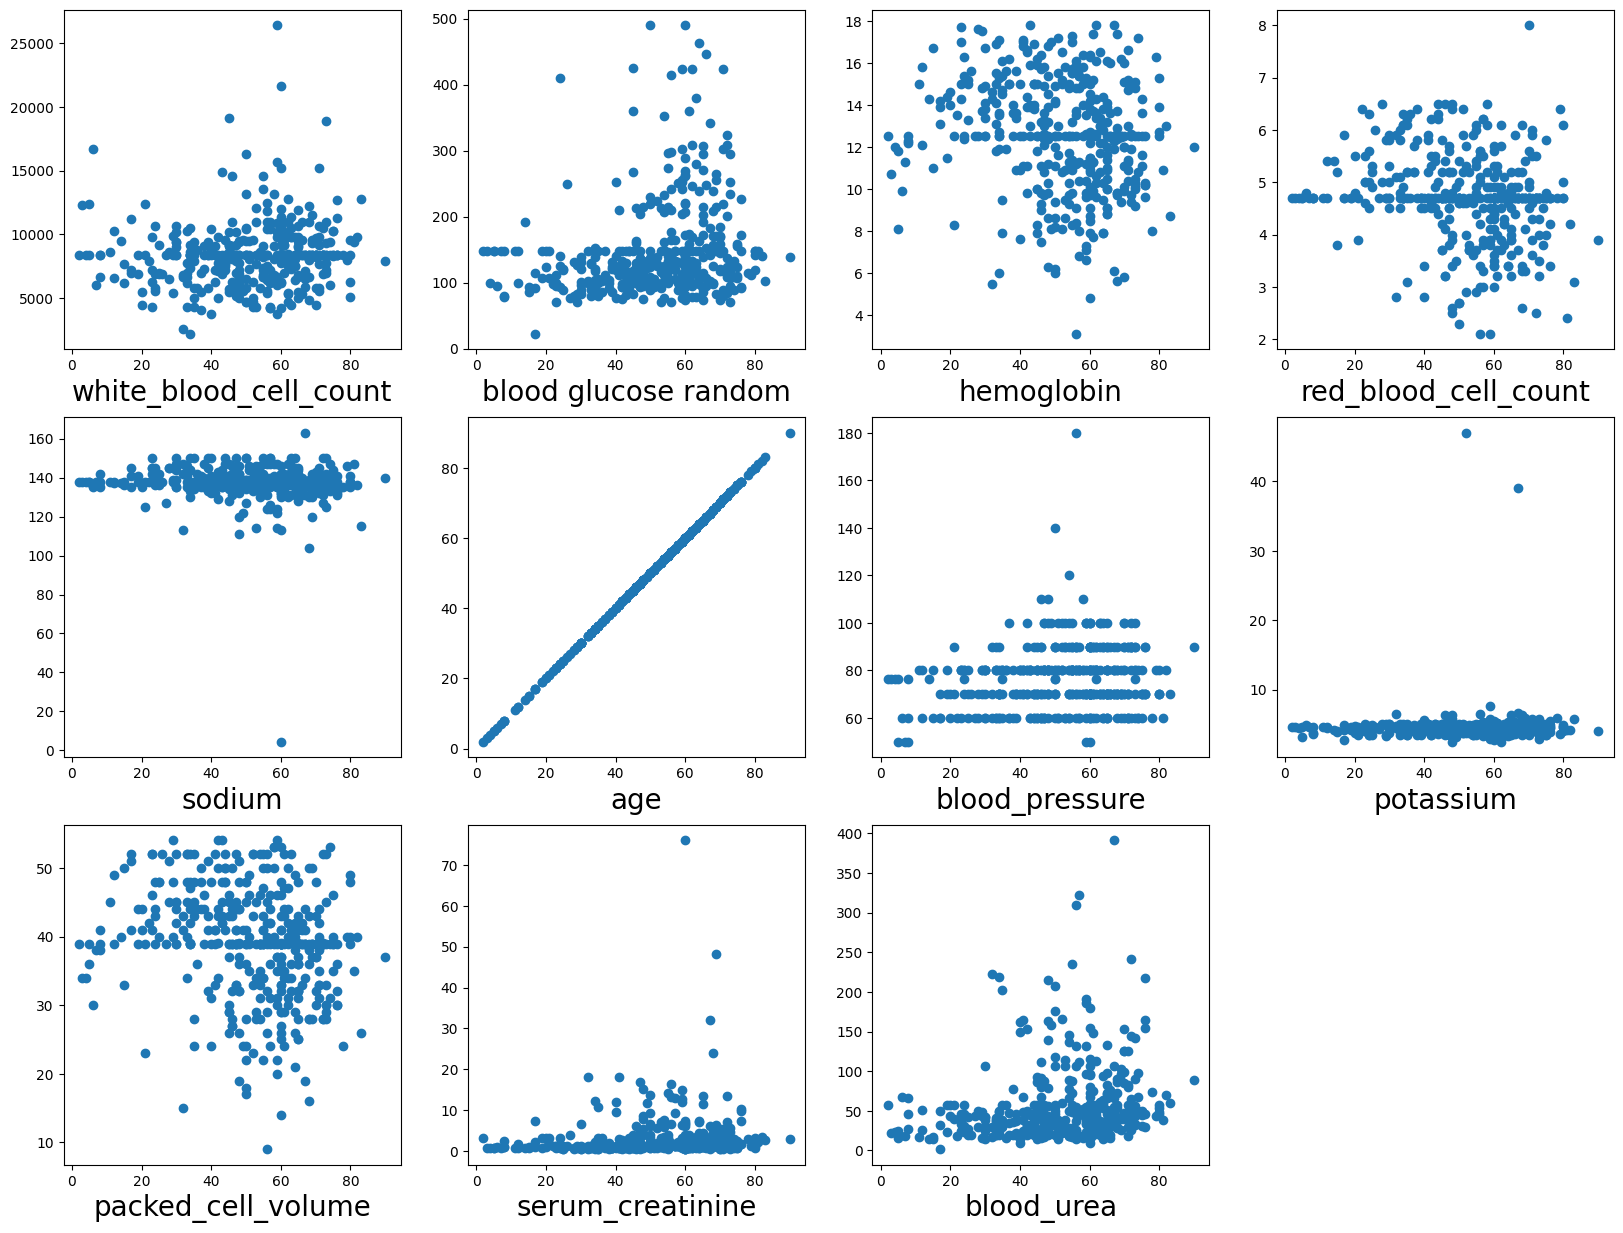

In [37]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber<=11 :     # as there are 11 continous columns in the data
        ax = plt.subplot(3,4,plotnumber) # 3,4 is refer to 3X4 matrix
        plt.scatter(data['age'],data[column]) #plotting scatter plot
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

Finding correlation between the independent Columns

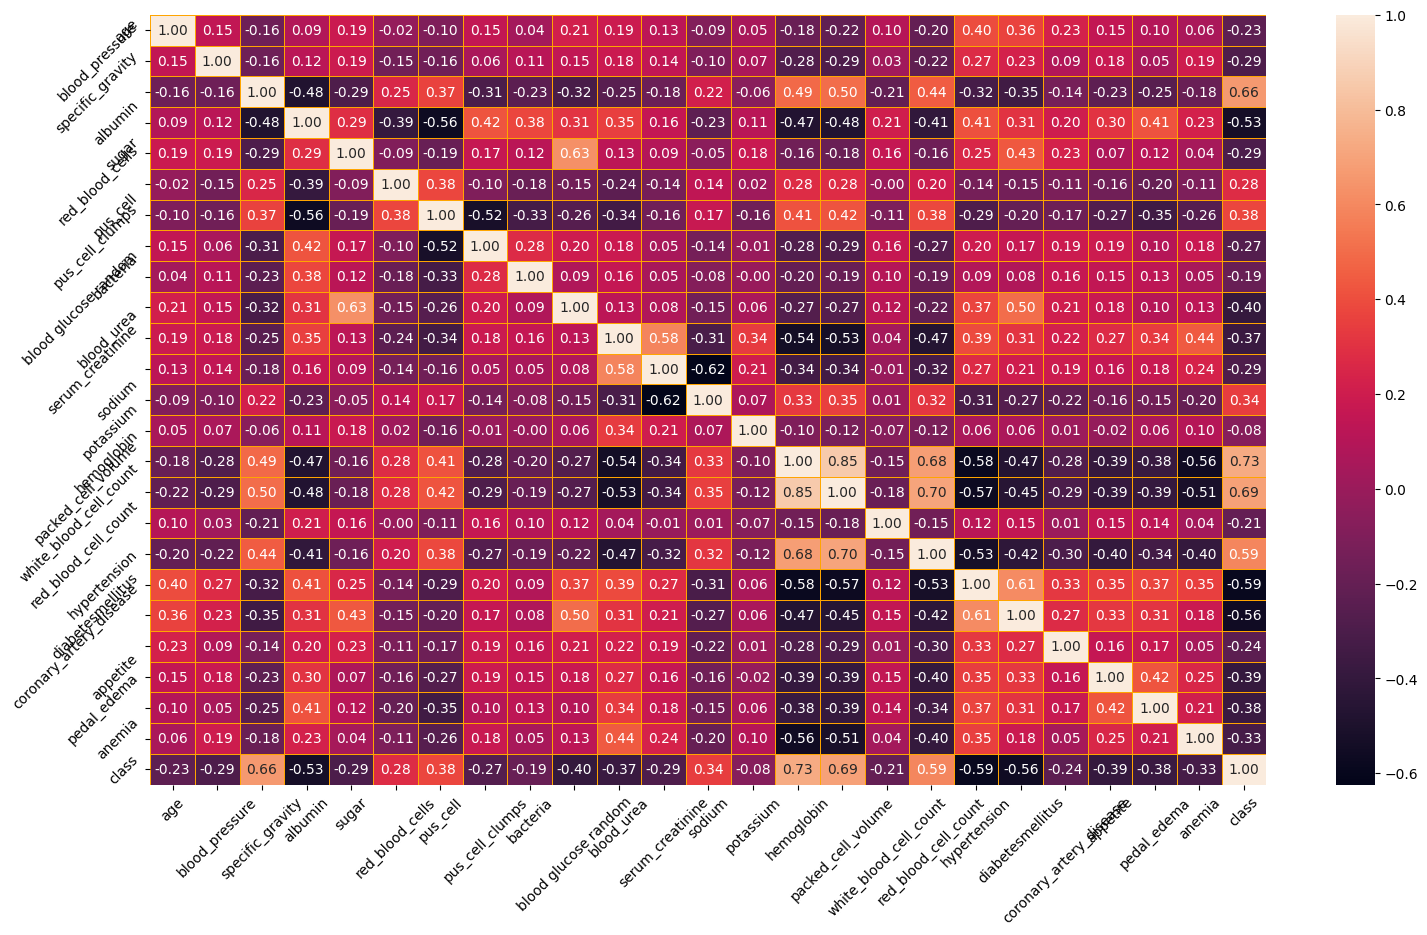

In [38]:
#HEAT MAP #correlation of parameters
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Correlation of features with target variable

In [39]:
correlation_matrix = data.corr()
target_correlations = correlation_matrix['class']
sorted_correlations = target_correlations.abs().sort_values(ascending=False)
print(sorted_correlations)

class                      1.000000
hemoglobin                 0.729628
packed_cell_volume         0.690060
specific_gravity           0.659504
red_blood_cell_count       0.590913
hypertension               0.590438
diabetesmellitus           0.559060
albumin                    0.531562
blood glucose random       0.401374
appetite                   0.393341
pus_cell                   0.375154
pedal_edema                0.375154
blood_urea                 0.372033
sodium                     0.342288
anemia                     0.325396
sugar                      0.294555
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cell_clumps            0.265313
coronary_artery_disease    0.236088
age                        0.230926
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64


Class

Creating Independent and Dependent

In [41]:
selcols=['pus_cell', 'blood glucose random','blood_urea',
            'pedal_edema', 'anemia','diabetesmellitus','hypertension',
         'hemoglobin','specific_gravity','packed_cell_volume','red_blood_cell_count','appetite']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 12)
(400, 1)


Splitting the data into train and test

In [43]:
# Hardcoded Train-Test Split
test_size = 0.2
total_samples = x.shape[0]
train_size = int(total_samples * (1 - test_size))

# Shuffle the indices to randomize the split
indices = np.arange(total_samples)
np.random.seed(2)  # For reproducibility
np.random.shuffle(indices)

# Create train and test sets based on the shuffled indices
train_indices = indices[:train_size]
test_indices = indices[train_size:]

x_train = x.iloc[train_indices].reset_index(drop=True)
y_train = y.iloc[train_indices].reset_index(drop=True)
x_test = x.iloc[test_indices].reset_index(drop=True)
y_test = y.iloc[test_indices].reset_index(drop=True)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(320, 12)
(320, 1)
(80, 12)
(80, 1)


**Building a Machine Learning Model**

In [44]:
class LogisticRegressionManual:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Create and train the logistic regression model
lgr_manual = LogisticRegressionManual(learning_rate=0.01, num_iterations=1000)
lgr_manual.fit(x_train.values, y_train.values.ravel())  # Convert DataFrame to numpy arrays


Predicting our output with the model which we build

In [45]:
# Make predictions with the model built
y_pred_manual = lgr_manual.predict(x_test.values)  # Convert DataFrame to numpy array
print(y_pred_manual)
print(c(y_pred_manual))  # Assuming 'c' is the Counter from collections


[1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0]
Counter({1: 44, 0: 36})


In [50]:
accuracy_score(y_test,y_pred_manual)

0.7875

Confustion Matrix of our model

In [51]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 5, 48],
       [16, 11]], dtype=int64)

# Using KNN model

In [52]:
import numpy as np
from collections import Counter as c

class KNearestNeighborsManual:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Calculate distances from x to all points in the training set
        distances = np.linalg.norm(self.X_train - x, axis=1)
        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = c(k_nearest_labels).most_common(1)
        return most_common[0][0]

# Hardcoded KNN
knn_manual = KNearestNeighborsManual(k=5)
knn_manual.fit(x_train.values, y_train.values.ravel())  # Convert DataFrame to numpy array


In [55]:
# Make predictions with the manual KNN implementation
y_pred_knn = knn_manual.predict(x_test.values)  # Convert DataFrame to numpy array
print(y_pred_knn)
print(c(y_pred_knn))  # Count occurrences of each predicted class


[0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1
 0 1 0 0 0 0]
Counter({0: 45, 1: 35})


In [57]:
# Manual accuracy calculation
correct_predictions = np.sum(pred == y_test.values.flatten())  # Count correct predictions
accuracy = correct_predictions / len(y_test)  # Calculate accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')  # Print accuracy as a percentage


Accuracy: 33.75%


# Using Navie Bayes

In [58]:
class GaussianNaiveBayes:
    def __init__(self):
        self.class_priors = {}
        self.mean = {}
        self.variance = {}

    def fit(self, X, y):
        # Calculate the prior probabilities and mean/variance for each class
        self.classes = np.unique(y)
        for c in self.classes:
            X_c = X[y.flatten() == c]
            self.class_priors[c] = X_c.shape[0] / X.shape[0]
            self.mean[c] = X_c.mean(axis=0)
            self.variance[c] = X_c.var(axis=0)

    def predict(self, X):
        # Calculate posterior probability for each class
        posteriors = []
        for c in self.classes:
            prior = np.log(self.class_priors[c])
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.variance[c])) \
                         -0.5 * np.sum(((X - self.mean[c]) ** 2) / self.variance[c], axis=1)
            posterior = prior + likelihood
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors, axis=0)]  # Return the class with highest posterior probability

# Using the custom Gaussian Naive Bayes
nb = GaussianNaiveBayes()
nb.fit(x_train.values, y_train.values.flatten())  # Convert DataFrame to numpy array


In [59]:
# Making predictions with the custom Gaussian Naive Bayes model
new_pred = nb.predict(x_test.values)  # Convert DataFrame to numpy array
print(new_pred)
print(c(new_pred))  # Count the predictions


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]
Counter({1: 80})


C:\Users\NANDINI\AppData\Local\Temp\ipykernel_13012\1111097722.py:21: RuntimeWarning: divide by zero encountered in log
  likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.variance[c])) \
C:\Users\NANDINI\AppData\Local\Temp\ipykernel_13012\1111097722.py:22: RuntimeWarning: divide by zero encountered in divide
  -0.5 * np.sum(((X - self.mean[c]) ** 2) / self.variance[c], axis=1)
C:\Users\NANDINI\AppData\Local\Temp\ipykernel_13012\1111097722.py:22: RuntimeWarning: invalid value encountered in divide
  -0.5 * np.sum(((X - self.mean[c]) ** 2) / self.variance[c], axis=1)
C:\Users\NANDINI\AppData\Local\Temp\ipykernel_13012\1111097722.py:21: RuntimeWarning: invalid value encountered in subtract
  likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.variance[c])) \


In [60]:
accuracy_score(y_test,new_pred)

0.3375

Hence we performed 3 various Algorithms(Logistic Regression, K-nearest neighbour, Navie Bayes) the Logistic Regression has highest accuracy. So Lgr model is better to perform prediction analysis

Saving the Lgr model in pickle file

In [64]:
pickle.dump(lgr_manual,open("CKD.pkl","wb"))

In [65]:
filename = 'CKD.sav'
pickle.dump(lgr_manual, open(filename, 'wb'))